<a href="https://colab.research.google.com/github/NikMikM/my_chocolate_repo/blob/main/songs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ноутбук

В данном ноутбуке будет произведена работа по заданию 1 курса *Машинное обучение для анализа данных*.

#1 Зависимости и монтирование датасета



In [268]:
from google.colab import drive
drive.mount('/content/v', force_remount=True)
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns



Mounted at /content/v


In [269]:
mainDF = pd.read_csv('/content/v/MyDrive/Colab Notebooks/song_data.csv')
mainDF.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


#2 Предварительный разведывательный анализ данных

In [270]:
mainDF.shape

(18835, 15)

In [271]:
mainDF.dtypes

song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

In [272]:
mainDF.isna().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

Мы видим, что у нас отсутствуют NAN значения. Значит на данном этапе, предварительной обработки не требуется

In [273]:
cat_cols = mainDF.select_dtypes(include='object')
cat_cols.describe()

,song_name
count,18835
unique,13070
top,Better
freq,21


In [274]:
num_cols = mainDF.select_dtypes(include='number')
num_cols.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


Как мы видим, у нас из строковых данных только название песни. Его можно убрать.

In [275]:
mainDF.drop('song_name', axis=1)

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


#3 Разведывательный анализ данных

Теперь, когда у нас произведена предварительная обработка данных, можно приступать к анализу. Сначала закодируем категориальные данные

In [276]:
df = mainDF.copy()
le = LabelEncoder()
for c in cat_cols.columns:
    df[c] = le.fit_transform(cat_cols[c])
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,1561,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,5541,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,9638,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,1760,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,4988,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


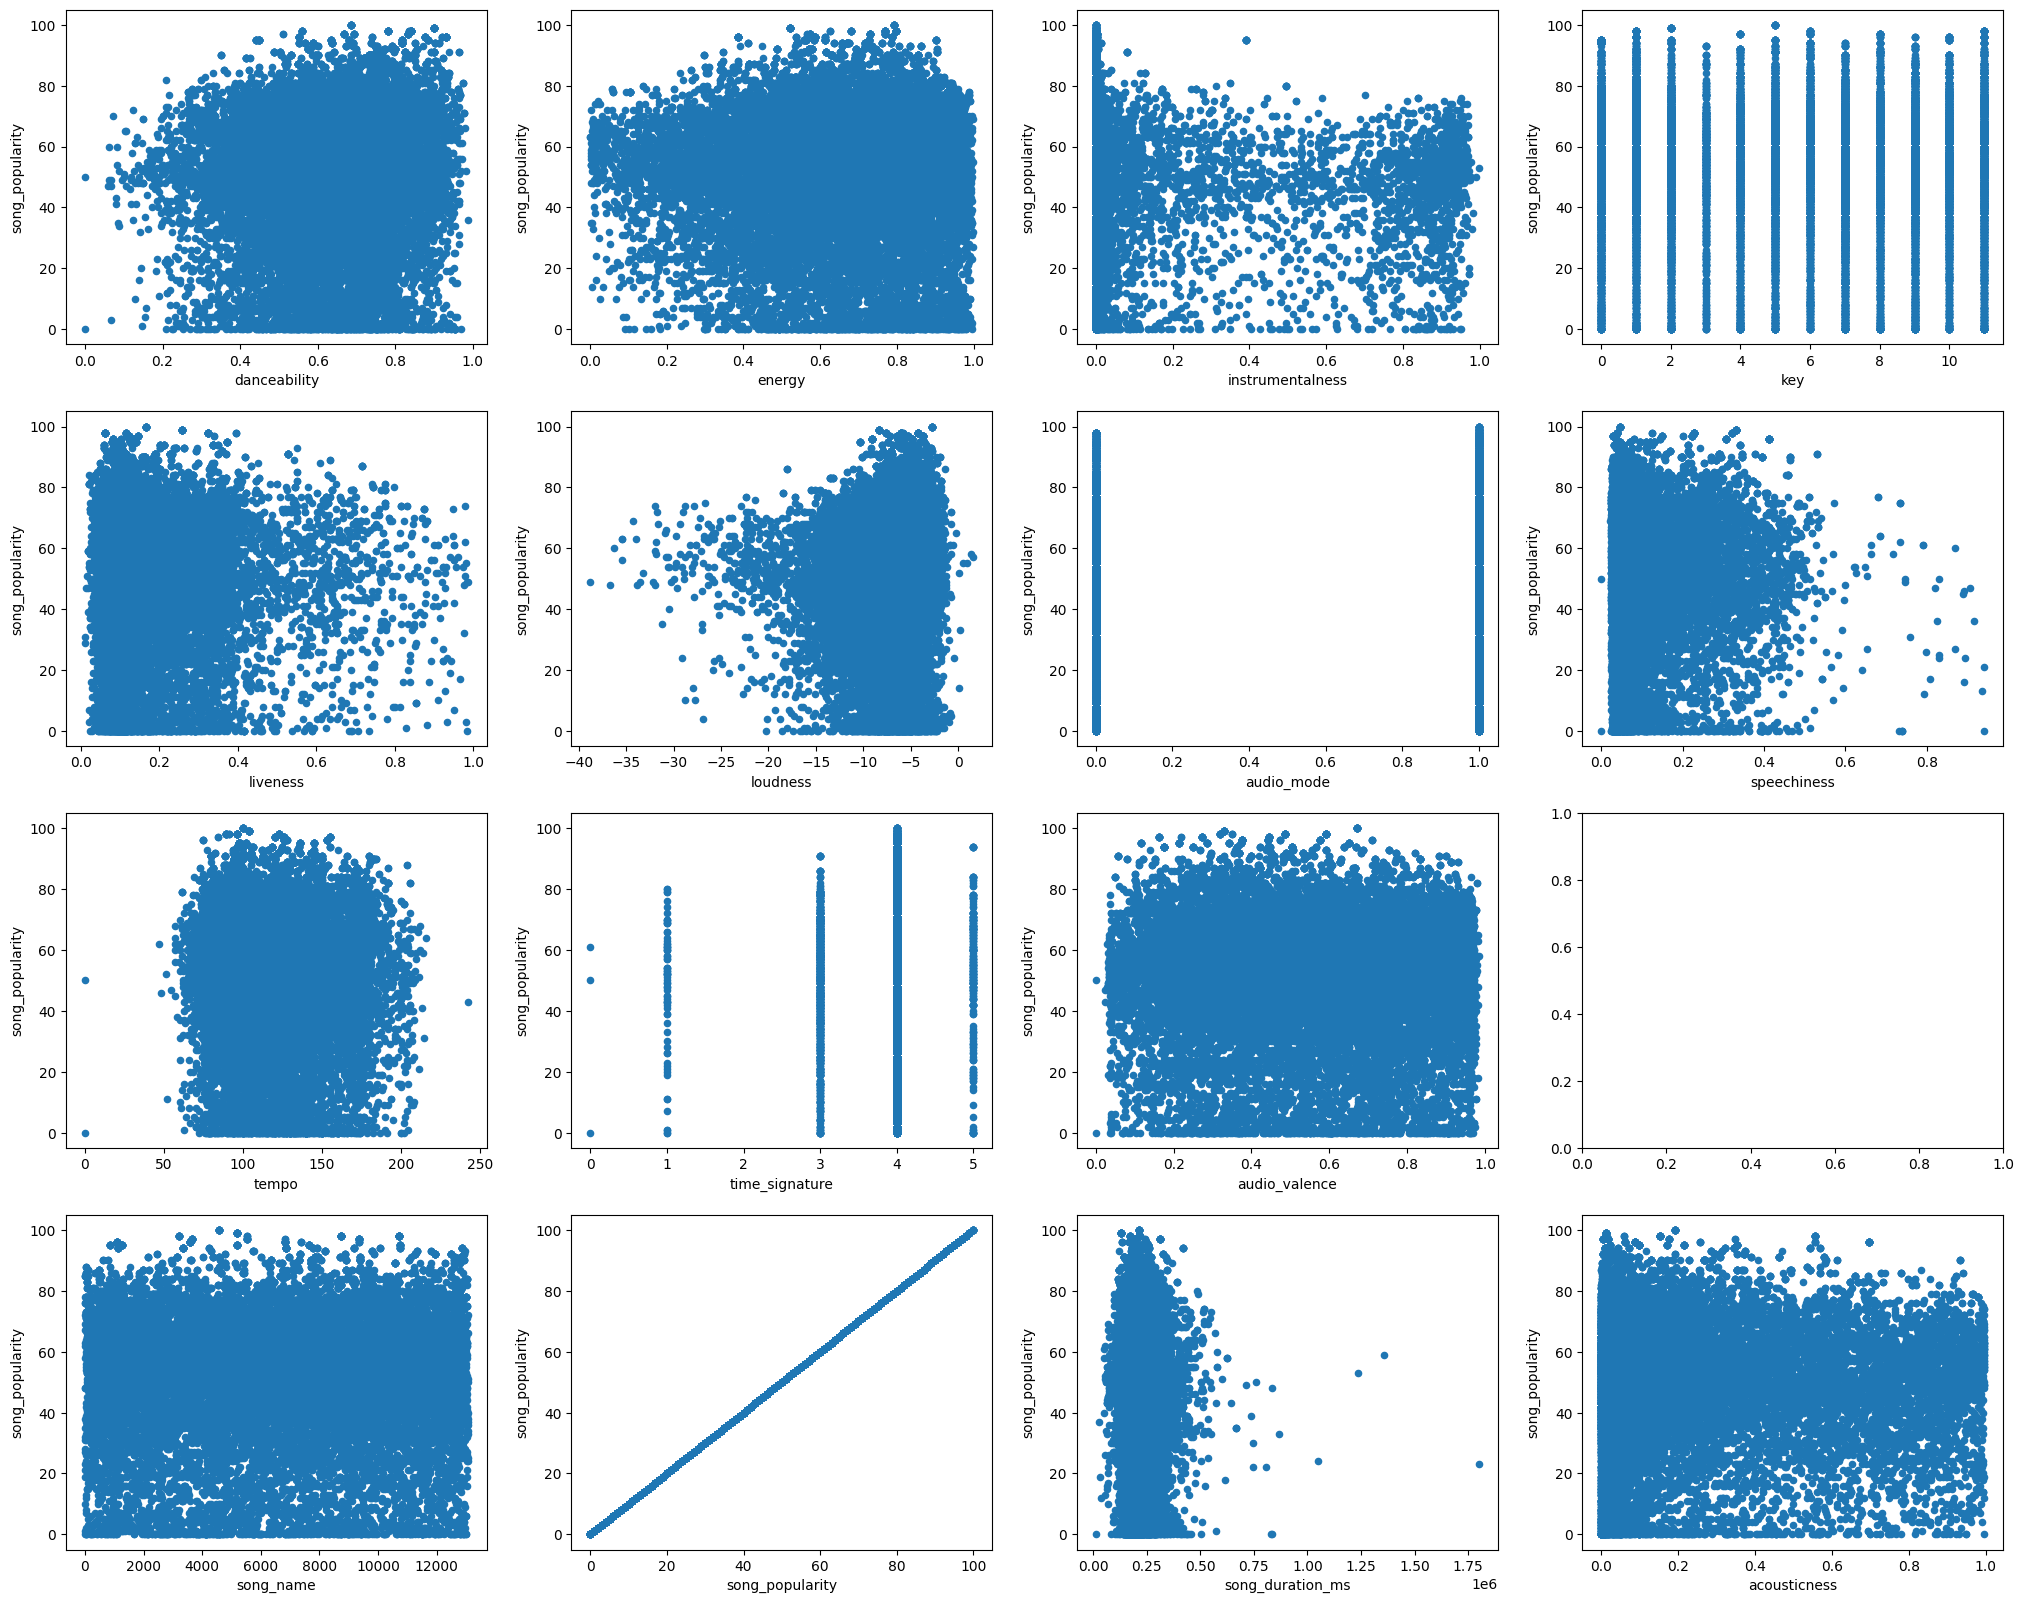

In [277]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25, 20))
for idx, feature in enumerate(df.columns):
    df.plot(feature, "song_popularity", subplots=True, kind="scatter", ax=axes[idx // 4 - 1, idx % 4])

<Axes: xlabel='audio_valence', ylabel='Count'>

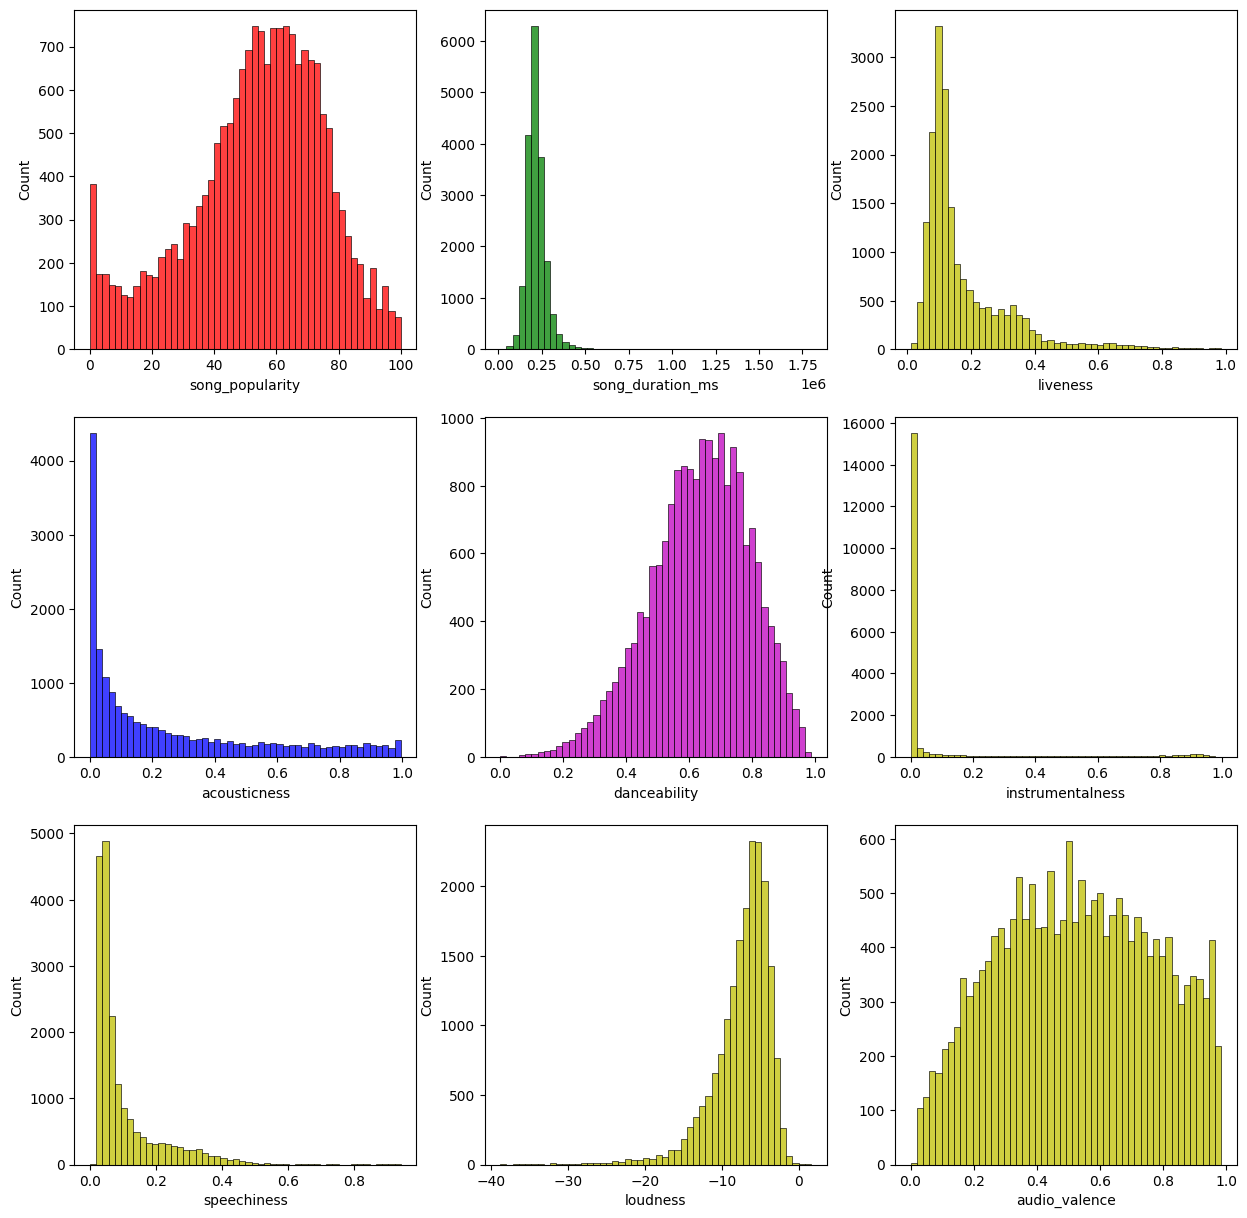

In [278]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
sns.histplot(df['song_popularity'], bins=50, color='r', ax=axes[0, 0])
sns.histplot(df['song_duration_ms'], bins=50, color='g', ax=axes[0, 1])
sns.histplot(df['acousticness'], bins=50, color='b', ax=axes[1, 0])
sns.histplot(df['danceability'].dropna(), bins=50, color='m', ax=axes[1, 1])
sns.histplot(df['speechiness'], bins=50, color='y', ax=axes[2, 0])
sns.histplot(df['loudness'], bins=50, color='y', ax=axes[2, 1])
sns.histplot(df['liveness'], bins=50, color='y', ax=axes[0, 2])
sns.histplot(df['instrumentalness'], bins=50, color='y', ax=axes[1, 2])
sns.histplot(df['audio_valence'], bins=50, color='y', ax=axes[2, 2])


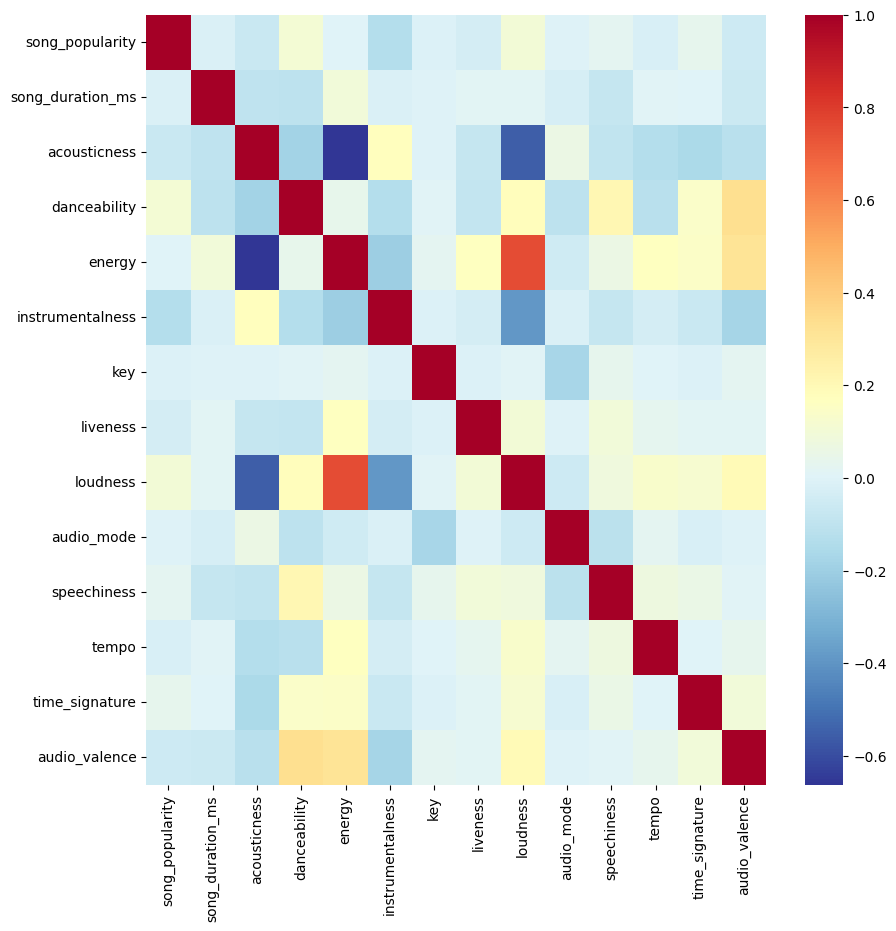

In [279]:
plt.figure(figsize=(10,10))
sns.heatmap(num_cols.corr(), cmap="RdYlBu_r");

Как мы видим, есть некоторая корреляция между громкостью/энергией и популярностью песни.

#4 Выбор метрики

Сначала разобьём наши данные на тренировочные и тестовые.

In [280]:
X = df.copy().drop('energy', axis=1)
y = df['energy']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.25)
X_train.head()


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,1561,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,5541,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,9638,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,1760,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,4988,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


Посмотрим на распределение целевой переменной. Как можно увидеть - близкое к нормальному.

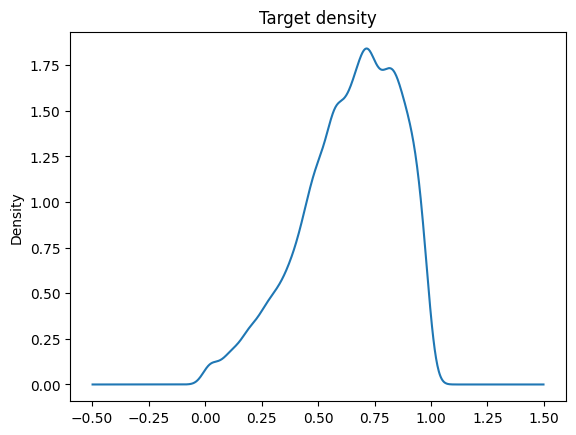

In [281]:
y.plot(kind='kde', title='Target density');

Создадим наивный классификатор.

In [282]:
dummy = DummyRegressor(strategy='median')
dummy.fit(X_train, y_train)
y_preds_dummy = dummy.predict(X_test)

И построим модель регрессии.

In [283]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds_lr = lr.predict(X_test)

В качестве оценки, для начала попробуем использовать RMSE, так как оно будет представляться в единицах целевой переменной.

In [284]:
print(f'RMSE for Dummy Regressor: {mean_squared_error(y_test, y_preds_dummy, squared=False)}')
print(f'RMSE for Linear regression: {mean_squared_error(y_test, y_preds_lr, squared=False)}')

RMSE for Dummy Regressor: 0.2139894302616552
RMSE for Linear regression: 0.11146914127217143


In [285]:
def plot_model_results(actual, predicted, title):
  results = pd.DataFrame({'True': actual, 'Prediction': predicted})
  sns.lmplot(x='True', y='Prediction', data=results, fit_reg=False)
  d_line= np.arange(results.min().min(), results.max().max())
  plt.plot(d_line, d_line, color='red', linestyle='--')
  plt.title = title
  plt.grid()
  plt.show()

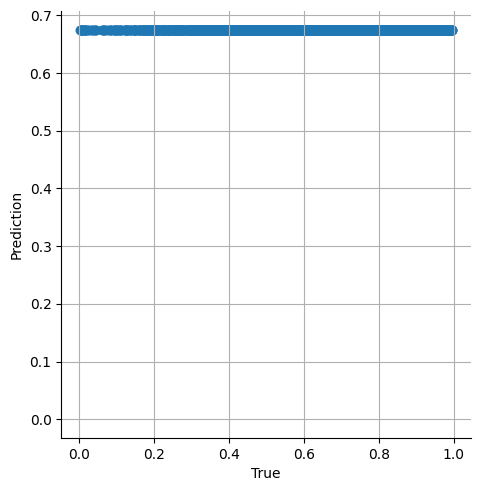

In [286]:
plot_model_results(y_test, y_preds_dummy, title='Dummy')

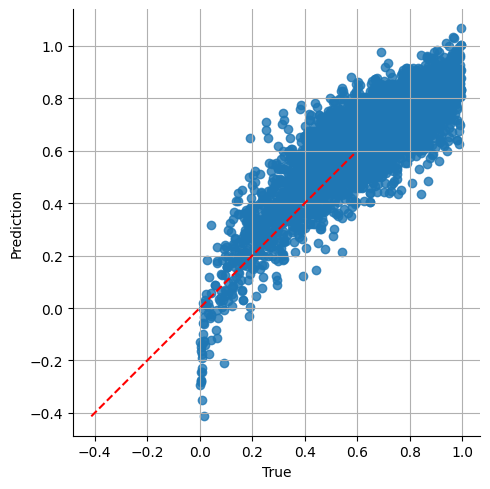

In [287]:
plot_model_results(y_test, y_preds_lr, title='Linear Regression')